# Compare average infection curves for a few output files from the `sim` routine.

See the file [running-simulations.md](../doc/running-simulations.md) in this repository for details on running simulations. The runs compared here are as follows:

```bash
python -m dissim.sim karate karate-low-pd-01.csv -b 0.05 -d 0.1
python -m dissim.sim karate karate-high-pd-01.csv -b 0.05 -d 0.4
python -m dissim.sim karate karate-low-pd-02.csv -b 0.05 -d 0.007
```

## Procedure

I ran the simulation with no vaccinated vertices and each vertex selected in turn as the first to be infected. For each selection, 100 trials were run for 50 runs (that is, 50 steps in time). 

In this notebook, I read the output files and averaged the number of infected nodes at each point in time to get one "curve" with 50 points. The two curves are plotted below.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the output files

In [30]:
fn1 = "../karate-low-pd-02.csv"
fn2 = "../karate-high-pd-01.csv"
name1 = "Karate graph, $p_b=0.05$, $p_d=0.07$"
name2 = "Karate graph, $p_b=0.05$, $p_d=0.40$"

In [26]:
df1 = pd.read_csv(fn1)
df2 = pd.read_csv(fn2)
df1.head()

,graph,leig,patient0,patient0_cent,rounds,strategy,centrality,model,pb,pd,...,infected_090,infected_091,infected_092,infected_093,infected_094,infected_095,infected_096,infected_097,infected_098,infected_099
0,karate,6.725698,0,NaN,100,NaN,NaN,SIS,0.05,0.007,...,21,22,22,20,21,21,22,23,26,27
1,karate,6.725698,0,NaN,100,NaN,NaN,SIS,0.05,0.007,...,24,27,26,25,26,25,23,20,19,22
2,karate,6.725698,0,NaN,100,NaN,NaN,SIS,0.05,0.007,...,26,24,22,20,20,20,19,17,17,17
3,karate,6.725698,0,NaN,100,NaN,NaN,SIS,0.05,0.007,...,22,24,21,23,22,20,23,24,25,20
4,karate,6.725698,0,NaN,100,NaN,NaN,SIS,0.05,0.007,...,22,24,23,21,21,22,18,17,19,21


## Compute averages for all the 50 columns with number of infected nodes at each point in time

In [28]:
df1_means = df1.iloc[:, 12:].mean(axis=0)
df2_means = df2.iloc[:, 12:].mean(axis=0)
df1_stdevs = df1.iloc[:, 12:].std(axis=0)
df2_stdevs = df2.iloc[:, 12:].std(axis=0)
X = list(range(len(df1_means)))

## Plot the results with a band showing the single standard deviation range

The plots below compare results for $p_b = 0.05, p_d=0.07$ (in red) and $p_b=0.05, p_d = 0.40$ (in blue).

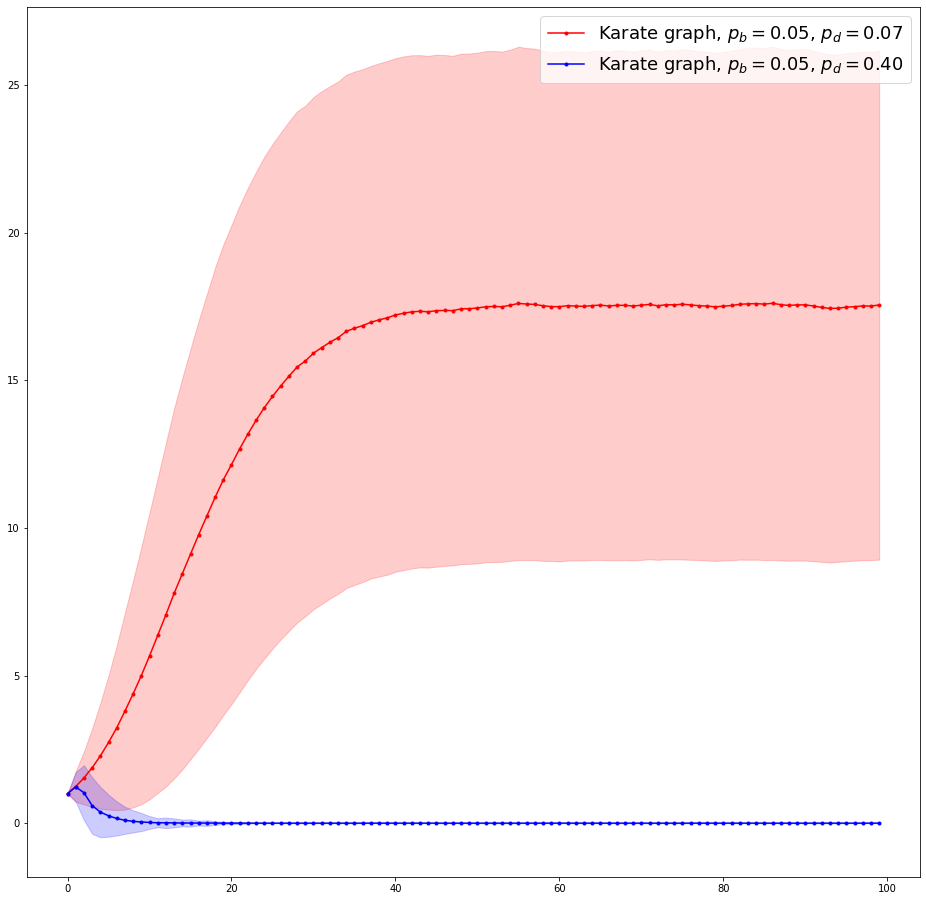

In [31]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.fill_between(X, df1_means - df1_stdevs, df1_means + df1_stdevs, color="red", alpha=0.2)
ax.fill_between(X, df2_means - df2_stdevs, df2_means + df2_stdevs, color="blue", alpha=0.2)
ax.plot(X, df1_means, marker=".", color="red", label=name1)
ax.plot(X, df2_means, marker=".", color="blue", label=name2)
ax.legend(prop={"size": 18})
plt.show()

Note that with the low $p_d$ value, the number of infected nodes 